# Bike Sharing Dataset
<h4>Each trip is anonymized and includes:</h4>
<br>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area between January 2020 and July 2020
<h6>

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
</h6>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [80]:
df1=pd.read_csv('1.csv')
#standardize the user_type to match the other dataframes
df1['user_type'].replace(to_replace=['Customer','Subscriber'],value=['casual','member'],inplace=True)
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,casual,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,member,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,casual,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,casual,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,casual,NaN


In [81]:
df2=pd.read_csv('2.csv')
#standardize the user_type to match the other dataframes
df2['user_type'].replace(to_replace=['Customer','Subscriber'],value=['casual','member'],inplace=True)
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,casual,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,casual,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,casual,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,casual,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,casual,NaN


In [82]:
df3=pd.read_csv('3.csv')
#standardize the user_type to match the other dataframes
df3['user_type'].replace(to_replace=['Customer','Subscriber'],value=['casual','member'],inplace=True)
df3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,casual,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,casual,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,casual,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,casual,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,casual,NaN


In [105]:
df4=pd.read_csv('4.csv')
#standardize the column names to match the dataframes
df4.rename(columns={'start_lat':'start_station_latitude','start_lng':'start_station_longitude',
                   'end_lat':'end_station_latitude','end_lng':'end_station_longitude','member_casual':'user_type',
                    'started_at':'start_time','ended_at':'end_time'
                   },inplace=True)
df4.drop(labels=['rideable_type'],axis=1,inplace=True)#Remove rideable_type as it is only present in this dataframe
df4.head()

,ride_id,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type
0,5A1FF31692371859,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual
1,D8D5BA2D4F051133,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual
2,A3633A9140CA4FF8,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual
3,301F57EB0197A5E0,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual
4,9429C701AF5744B3,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual


In [86]:
df5=pd.read_csv('5.csv')
#standardize the column names to match the dataframes
df5.rename(columns={'start_lat':'start_station_latitude','start_lng':'start_station_longitude',
                   'end_lat':'end_station_latitude','end_lng':'end_station_longitude','member_casual':'user_type',
                    'started_at':'start_time','ended_at':'end_time'
                   },inplace=True)
df5.drop(columns=['is_equity'],axis=1,inplace=True)# drop is_equity columns as it is only present in this dataframe

df5.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual


In [213]:
df6=pd.read_csv('6.csv')
#standardize the column names to match the dataframes
df6.rename(columns={'start_lat':'start_station_latitude','start_lng':'start_station_longitude',
                   'end_lat':'end_station_latitude','end_lng':'end_station_longitude','member_casual':'user_type',
                    'started_at':'start_time','ended_at':'end_time'
                   },inplace=True)
df6.drop(labels=['rideable_type'],axis=1,inplace=True)#Remove rideable_type as it is only present in this dataframe
df6.head()

,ride_id,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type
0,08A4A9F7315901F3,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [214]:
df=pd.DataFrame()# Create a new dataframe to get all the sub dataframes together
df=df.append([df1,df2,df3,df4,df5,df6],ignore_index=True,verify_integrity=True)
df.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,ride_id,rideable_type,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,13052.0,83118.0,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-02-01 14:29:06.2630,NaN,NaN,NaN,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-01-31 15:23:47.7330,casual
1,12235.0,68239.0,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-02-01 10:37:51.0000,NaN,NaN,NaN,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-01-31 15:40:31.6160,member
2,12822.0,55407.0,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:11:44.3170,NaN,NaN,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:48:16.6350,casual
3,11705.0,54929.0,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:08:32.6340,NaN,NaN,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:53:03.4130,casual
4,3673.0,55700.0,371.0,37.802746,-122.413579,Lombard St at Columbus Ave,2020-02-01 08:40:53.6460,NaN,NaN,NaN,12.0,37.796389,-122.394586,Pier 1/2 at The Embarcadero,2020-01-31 17:12:33.4600,casual


In [215]:
def calculate_distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [216]:
df['distance']=df.apply(lambda x:calculate_distance(x.start_station_latitude,x.start_station_longitude,
                  x.end_station_latitude,x.end_station_longitude),axis=1)

In [217]:
df.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,ride_id,rideable_type,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,distance
0,13052.0,83118.0,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-02-01 14:29:06.2630,NaN,NaN,NaN,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-01-31 15:23:47.7330,casual,0.000000
1,12235.0,68239.0,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-02-01 10:37:51.0000,NaN,NaN,NaN,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-01-31 15:40:31.6160,member,0.000000
2,12822.0,55407.0,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:11:44.3170,NaN,NaN,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:48:16.6350,casual,0.000000
3,11705.0,54929.0,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:08:32.6340,NaN,NaN,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:53:03.4130,casual,0.000000
4,3673.0,55700.0,371.0,37.802746,-122.413579,Lombard St at Columbus Ave,2020-02-01 08:40:53.6460,NaN,NaN,NaN,12.0,37.796389,-122.394586,Pier 1/2 at The Embarcadero,2020-01-31 17:12:33.4600,casual,127.063907


In [104]:
df.shape[0]

1285685

In [219]:
#Change the time column into a datetime fomrat
df.start_time=pd.to_datetime(df['start_time'])
df.end_time=pd.to_datetime(df['end_time'])

In [228]:
#Create a column to extract the hours from the start time column
df['start_hour']=1
df['start_hour']=df.start_time.dt.hour.astype(float)# Convert the values into int
df['end_time_minutes']=df.end_time.dt.hour.astype(float)*60+df.end_time.dt.minute.astype(float)
df['start_hour_minutes']=df.start_time.dt.hour.astype(float)*60+df.start_time.dt.minute.astype(float)
df['time_diff']=df.end_time-df.start_time
df['day']=1
df['day']=df.start_time.dt.strftime('%a')
#Create a column to extract the months from the start time column
df['start_month']=1
df['start_month']=df.start_time.dt.month.astype(int)# Convert the values into int
df['time_diff']=pd.to_datetime(df['time_diff'])
df['duration_minutes']=df['time_diff'].dt.hour.astype(float)*60+df['time_diff'].dt.minute.astype(float)

In [226]:
type(df.time_diff[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [2]:
df=pd.read_csv('file.csv')

In [3]:
df.head()

,user_type,start_hour,day,start_month,distance,duration_minutes
0,casual,15.0,Fri,1,0.000000,1385.0
1,member,15.0,Fri,1,0.000000,1137.0
2,casual,17.0,Fri,1,0.000000,923.0
3,casual,17.0,Fri,1,0.000000,915.0
4,casual,17.0,Fri,1,127.063907,928.0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285685 entries, 0 to 1285684
Data columns (total 24 columns):
bike_id                    905007 non-null float64
duration_sec               905007 non-null float64
end_station_id             653013 non-null float64
end_station_latitude       1285043 non-null float64
end_station_longitude      1285043 non-null float64
end_station_name           654287 non-null object
end_time                   1285685 non-null datetime64[ns]
rental_access_method       617858 non-null object
ride_id                    380678 non-null object
rideable_type              138251 non-null object
start_station_id           658674 non-null float64
start_station_latitude     1285685 non-null float64
start_station_longitude    1285685 non-null float64
start_station_name         659907 non-null object
start_time                 1285685 non-null datetime64[ns]
user_type                  1285685 non-null object
distance                   1285043 non-null float64
star

In [257]:
# Getting the interesting columns into a new dataframe
df=df[['user_type','start_hour','day','start_month','distance','duration_minutes']]
df.head()

,user_type,start_hour,day,start_month,distance,duration_minutes
0,casual,15.0,Fri,1,0.000000,1385.0
1,member,15.0,Fri,1,0.000000,1137.0
2,casual,17.0,Fri,1,0.000000,923.0
3,casual,17.0,Fri,1,0.000000,915.0
4,casual,17.0,Fri,1,127.063907,928.0


In [236]:
# Save the full dataframe into a csv file
df.to_csv('file.csv',index=False)

In [258]:
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

# Data visualization

# Member compared to Casual users
<br>
This bar chart shows that the proportions of both casual and member users. It shows that the member users represent 54 percent of the whole population, whereas the casual users represent 46 percent.

Text(0.5, 1.0, 'The proportion of user types per population')

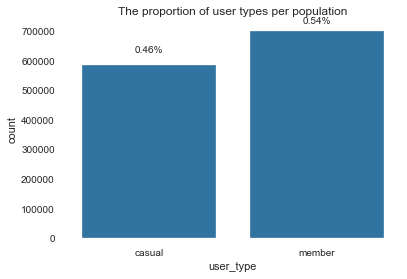

In [87]:
sb.countplot(df['user_type'],color=sb.color_palette()[0])
member=df[df['user_type']=='member'].count()[0]/df['user_type'].shape[0]
casual=df[df['user_type']=='casual'].count()[0]/df['user_type'].shape[0]
pct_string='{:0.2f}%'.format(member)
plt.text(1,750000,pct_string,ha='center',va='top')
pct_string='{:0.2f}%'.format(casual)
plt.text(0,650000,pct_string,ha='center',va='top')
plt.title('The proportion of user types per population')

# Weekdays
The graph below shows the proportions of weekdays. It shows the differences in proportions are in range of 3%.

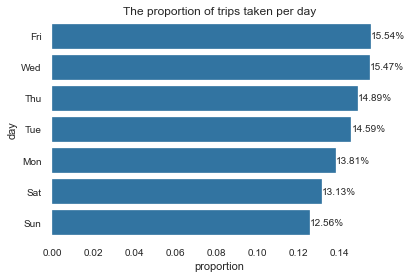

In [89]:
n_observations=df.shape[0]
type_counts=df.day.value_counts()
max_point=type_counts[0]/n_observations
values=np.arange(0,max_point,.02)
value_ticks=['{:0.2f}'.format(v) for v in values]
value_ticks
color=sb.color_palette()[0]
order=df.day.value_counts().index
plt.xticks(n_observations*values,value_ticks);
sb.countplot(data=df,y='day',color=color,order=order);
plt.xticks(n_observations*values,value_ticks);
plt.xlabel('proportion');
for i in range(type_counts.shape[0]):
    count=type_counts[i]
    pct_string='{:0.2f}%'.format(100*count/n_observations)
    plt.text(count+1,i,pct_string,va='center')
plt.title('The proportion of trips taken per day');

# Time of day
The graph below show the poroportion if population used the service in different hours of the day. it showed that 5 pm occupied the highest place with almost 10.77%, then come in the second, and third places 6pm and 4:00 pm respectively. which indicates that bikes are more likely to be used after work. Another interesting obesrvation is 8:00 am and 9:00 pm got high prportions as they recorded 7.67% anf 6.2% respectively, which may indicate that these proportions of the customers use bikes to go to work or most likely to.

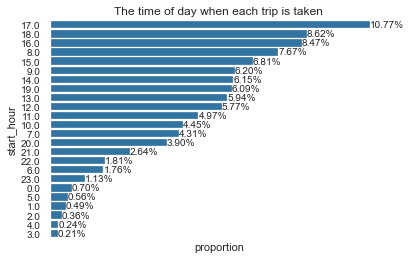

In [91]:
type_counts=sorted(df.start_hour.value_counts(),reverse=True)
max_point=type_counts[0]/n_observations
values=np.arange(0,max_point,.02)
value_ticks=['{:0.2f}'.format(v) for v in values]
value_ticks
color=sb.color_palette()[0]
order=df.start_hour.value_counts().index
sb.countplot(data=df,y='start_hour',color=color,order=order);
plt.xticks([])
plt.xlabel('proportion');
for i in range(len(type_counts)):
    count=type_counts[i]
    pct_string='{:0.2f}%'.format(100*count/n_observations)
    plt.text(count+1,i,pct_string,va='center')
plt.title('The time of day when each trip is taken');

# Month of the year
The data being presented represents the first half of 2020. As per the graph, it shows that Feubruary recored the highest proportion as it got 33% of the data, whereas, April came in the last place.

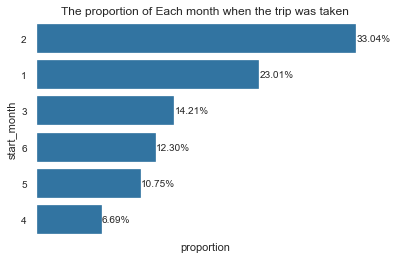

In [93]:
type_counts=sorted(df.start_month.value_counts(),reverse=True)
max_point=type_counts[0]/n_observations
values=np.arange(0,max_point,.02)
value_ticks=['{:0.2f}'.format(v) for v in values]
value_ticks
color=sb.color_palette()[0]
order=df.start_month.value_counts().index
sb.countplot(data=df,y='start_month',color=color,order=order);
plt.xticks([])
plt.xlabel('proportion');
for i in range(len(type_counts)):
    count=type_counts[i]
    pct_string='{:0.2f}%'.format(100*count/n_observations)
    plt.text(count+1,i,pct_string,va='center')
plt.title('The proportion of Each month when the trip was taken');

# Duration in minutes:
The histogram below plots the duration of the trip in minutes. It shows that most of the trips were for 0 to 20 minutes, which means that the customers preferred using biks for short trips.

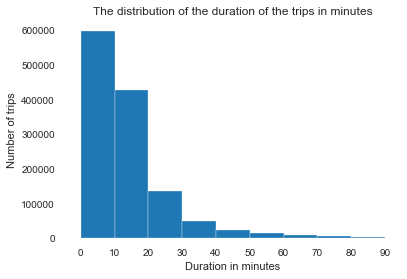

In [94]:
bins=np.arange(0,100,10)
plt.hist(df['duration_minutes'],bins=bins);
plt.xticks(bins,bins);
plt.xlabel('Duration in minutes');
plt.ylabel('Number of trips')
plt.title('The distribution of the duration of the trips in minutes');

# distance vs. duration_minutes
the scatter plot below shows that there is a positive correlation between the distance and the duration of the trip in minutes

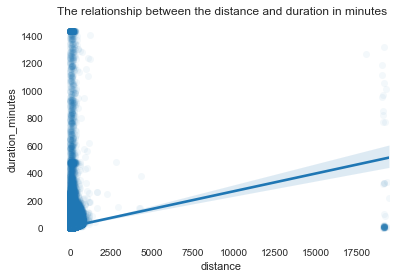

In [96]:
sb.regplot(data=df,x='distance',y='duration_minutes',x_jitter=.4,scatter_kws={'alpha':1/20});
plt.title('The relationship between the distance and duration in minutes');

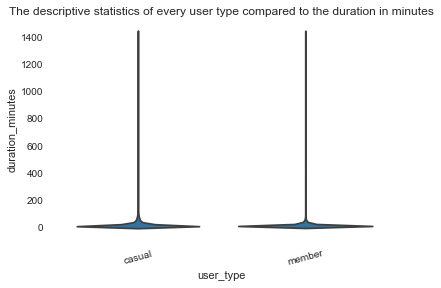

In [97]:
sb.violinplot(data=df,x='user_type',y='duration_minutes',color=sb.color_palette()[0],inner=None);# different variation
plt.xticks(rotation=15);
plt.title('The descriptive statistics of every user type compared to the duration in minutes');

# User type vs. day
The graph shows that on average the members have more rides than the casual users except for Saturdays. Which may ignite the need to expand in attracting more casual users to be members.

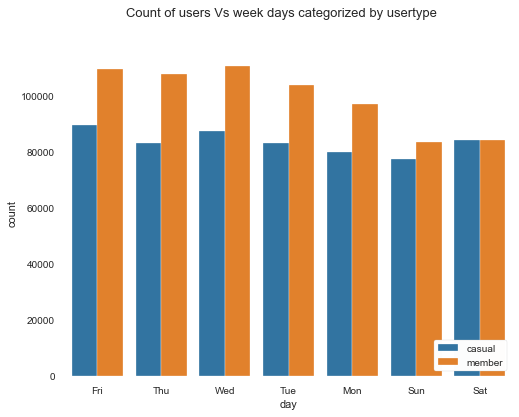

In [521]:
size = (8,6)
ax = sb.countplot(data = df, x='day' ,hue = 'user_type')
ax.legend(loc = 4, ncol = 1, framealpha =3)
fig.suptitle('Count of users Vs week days categorized by usertype', size = 13);

# User_type vs. Start_hour

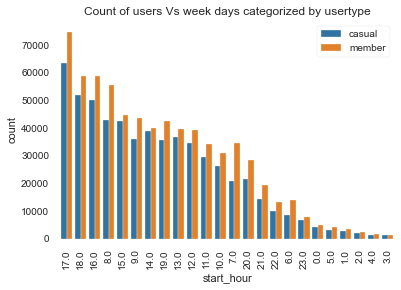

In [99]:
size = (8,6)
ax = sb.countplot(data = df,x='start_hour' ,hue = 'user_type',order=df.start_hour.value_counts().index)
ax.legend(loc = 4, ncol = 1, framealpha =3)
plt.xticks(rotation=90);
plt.title('Count of users Vs week days categorized by usertype');
plt.legend(loc=1)

# Multivariate exploration

# The relationship between the duration in minutes, the distance and user type
<br>
The graph below shows the correlation between the distance and duration in minutes when adding another category which is the user type to the data. The graph shows positive correlation when adding the third dimension which is the user type

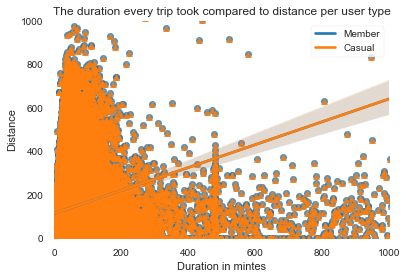

In [42]:
ttype_marker=[['member','o'],
             ['casual','^']]
for ttype,marker in ttype_marker:
    sub=df.loc[df['user_type']==ttype]
    sb.regplot(data=df,x='duration_minutes',y='distance',x_jitter=.04,fit_reg=True,marker=marker)
plt.legend(['Member','Casual'],)
plt.title('The duration every trip took compared to distance per user type');
#plt.yscale('log');
tick=[20,60,140,280,560,1000]
#plt.xscale('log');

plt.ylabel('Distance');
plt.xlabel('Duration in mintes');
plt.ylim(0,1000);
plt.xlim(0,1000);

# The distibution of duration in minutes for every day in every month per user type

Text(0.5, 0.98, 'The distribution of duration of the trip for every day per each month and each user type')

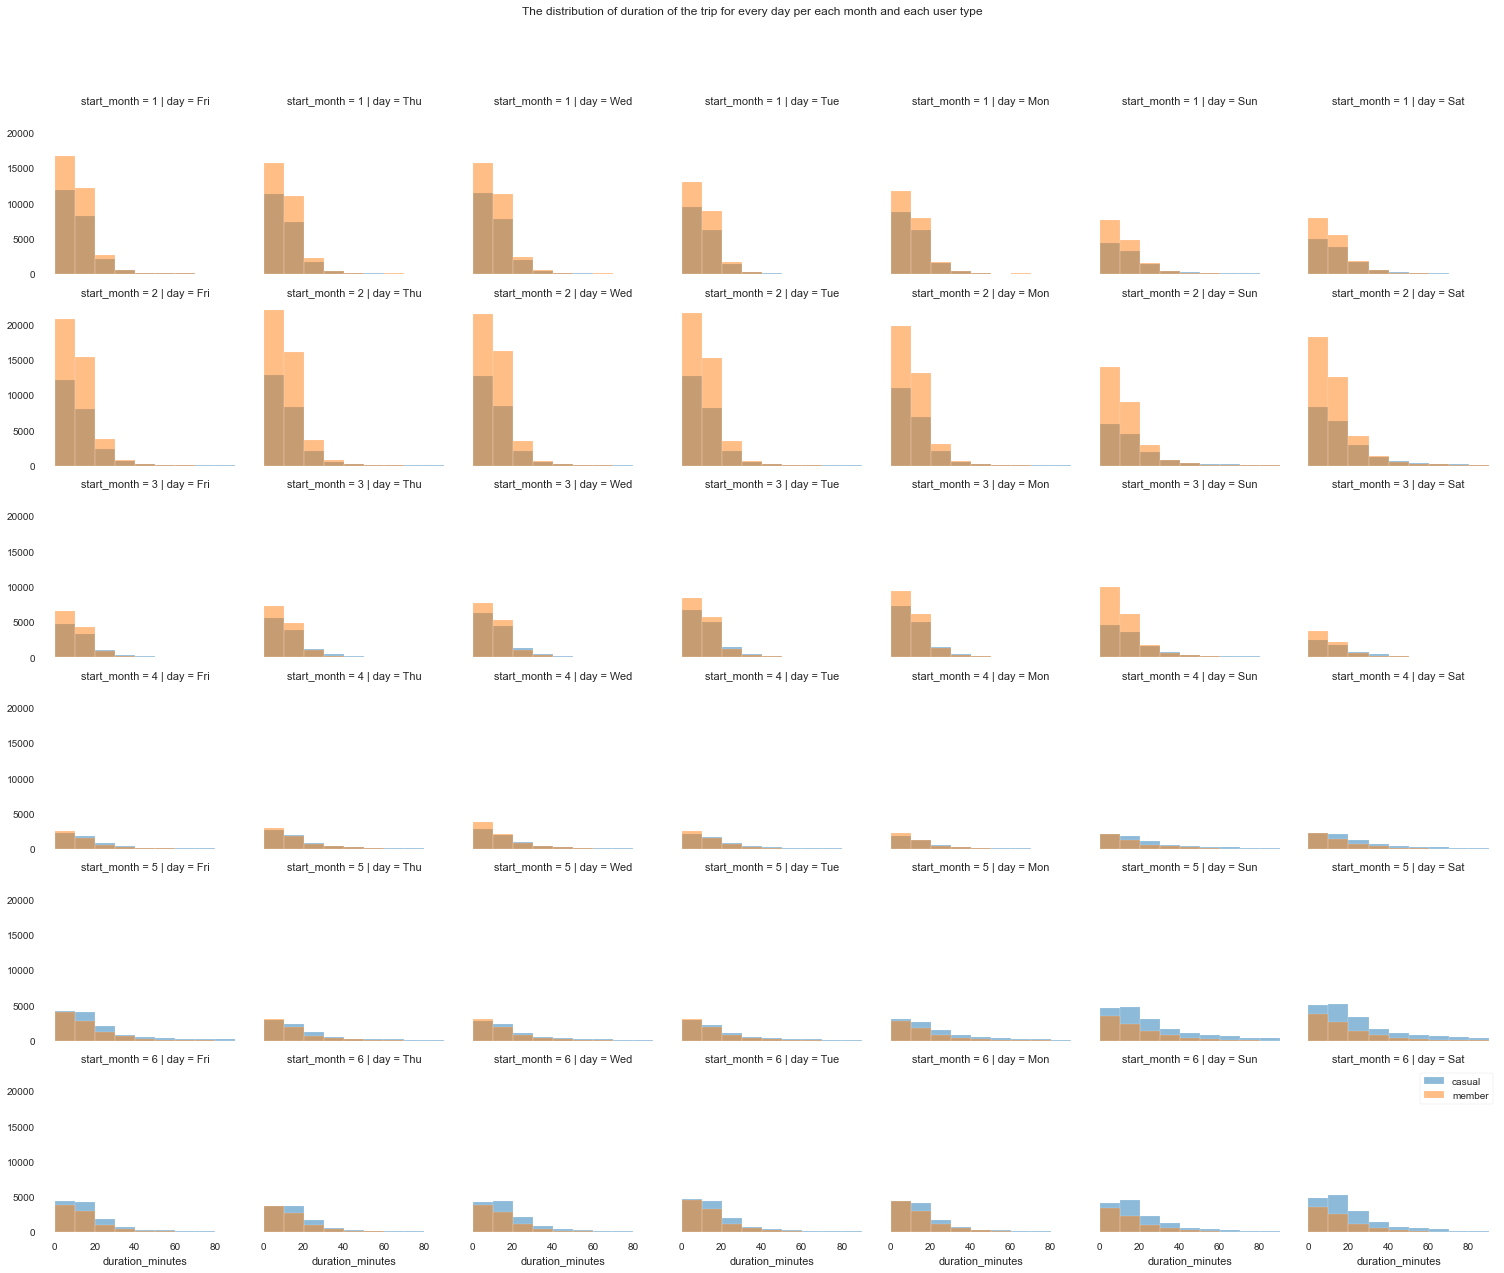

In [86]:
g=sb.FacetGrid(data=df,col='day',hue='user_type',row='start_month')
bins=np.arange(0,100,10)
g.map(plt.hist,'duration_minutes',bins=bins,alpha=.5)
plt.legend();
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The distribution of duration of the trip for every day per each month and each user type')